# Data loading and overview

The aim of the project is explore the influence of the living conditions of students aged 15 to 22 on their math performance in order to identify students at an early stage at risk.


In [1225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import scipy.stats.mstats as mstats


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

data = pd.read_csv('stud_math.csv')

print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 395 rows and 30 columns.


# Functions

In [1226]:
# Function for creation boxplots

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Function for the statistical significance determination

def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # the Bonferoni amendment
            print('The statistical significance has been found for column ', column)
            break

# Data preprocessing

In [1227]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [1228]:
# Let's rename columns for easy use with lower method

data.columns = map(lambda x: str(x).lower(), data.columns)
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

# Data exploration

In [1229]:
print(
    f'There are {data.isnull().any().sum()} columns in dataset with missing values.')

There are 27 columns in dataset with missing values.


In [1230]:
# Let's find out how many values are missing in every column

for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
pstatus - 11.0%
medu - 1.0%
fedu - 6.0%
mjob - 5.0%
fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


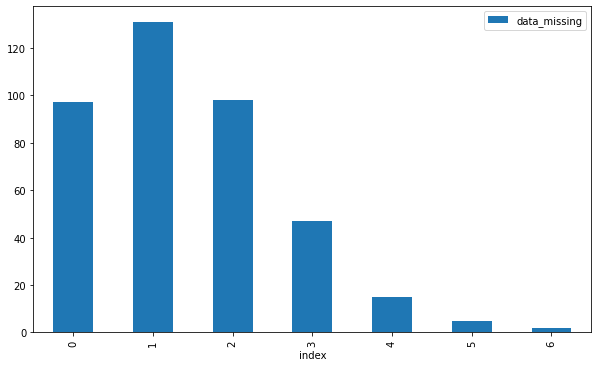

In [1231]:
# Let's create columns with number fo missing values
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        data['{}_ismissing'.format(col)] = missing


# Histogram creation
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['data_missing'] = data[ismissing_cols].sum(axis=1)


data['data_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='data_missing', figsize=(10, 6))

# Deleting temorary columns for missing data counting
data.drop(data.filter(regex='ismissing').columns, axis=1, inplace=True)

In [1232]:
# As we can see, there are only few rows with missing data. Let's find out how much exactly.

display(data[data['data_missing'] > 4])

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,data_missing
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0,5
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0,6
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0,5
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0,6
268,GP,M,18,U,NaN,NaN,4.0,2.0,NaN,other,reputation,father,NaN,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,yes,5.0,4.0,5.0,5.0,10.0,50.0,5
280,GP,M,17,U,NaN,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0,5
313,GP,F,19,U,NaN,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0,5


In [1233]:
# There are 7 rows with missing more than 3 values. Let's delete them.

data.drop(data[data.data_missing > 4].index, inplace=True)

In [1234]:
# The most major data is score. We can see that only 2.0% of data is missing. Let's delete these rows.

data = data.dropna(how='any', subset=['score'])

## Numerical values exploration


#### Columns "absences", "score", "age"

count    372.000000
mean       7.233871
std       23.761997
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

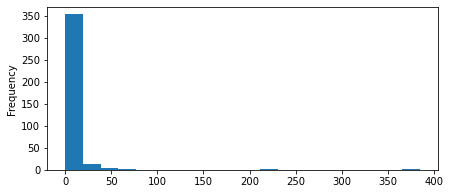

In [1235]:
ax = data.absences.plot.hist(bins=20, figsize=(7, 3))

data.absences.describe()

In [1236]:
# As we can see, there is a oulier, let's check this, but first we replace the missing values with median, not mean.

data['absences'] = data['absences'].fillna(data['absences'].median())

0.25 quantile : 0.0, 0.75 quantile: 8.0, IQR: 8.0,  Interval: [-12.0, 20.0].


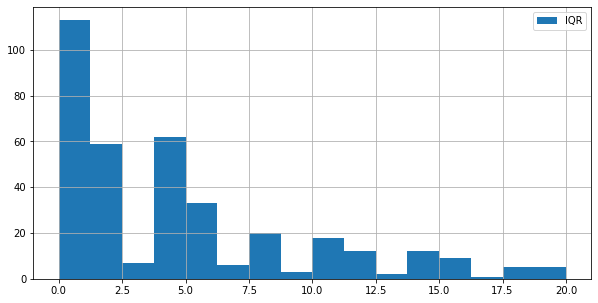

In [1237]:
median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)

print('0.25 quantile : {},'.format(perc25), '0.75 quantile: {},'.format(perc75), "IQR: {}, ".format(
    IQR), "Interval: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

data.absences.loc[data.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, label='IQR', figsize=(10, 5))

plt.legend()

In [1238]:
# Let's delete all outliers, but I don't want to loose many values and just delete data with absences>100 .
# I think that it's quite possible to miss 100 lessons.

data = data.loc[data.absences.between(0, 100)]

count    380.000000
mean      16.660526
std        1.257388
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

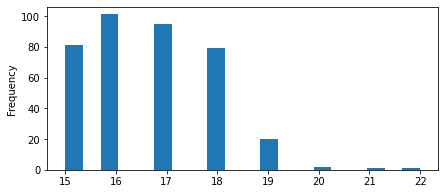

In [1239]:
# Let's look at 'age' column
ax = data.age.plot.hist(bins=20, figsize=(7, 3))

data.age.describe()

# There is no missig values and there is no outlier. But age does not apply to living conditions,
# so we won't consider it in our analyse.

count    380.000000
mean      52.144737
std       23.093651
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

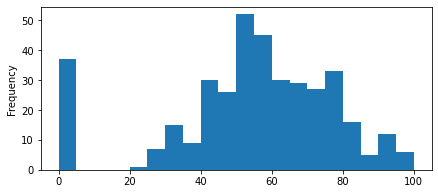

In [1240]:
# Let's look at 'score' column.

ax = data.score.plot.hist(bins=20, figsize=(7, 3))

data.score.describe()

In [1241]:
# Obviously, there is a outlier with values = "0". Let's fill in all score=0 with median value of score.

median = data['score'].median()
data['score'] = data['score'].replace(0.0, median)

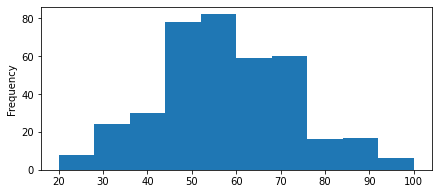

In [1242]:
ax = data.score.plot.hist(bins=10, figsize=(7, 3))

In [1243]:
# Let's see if the data from columns 'score' and 'absences' are correlated

data[['score', 'absences']].corr()

,score,absences
score,1.000000,-0.190712
absences,-0.190712,1.000000


In [1244]:
# We can see negative correlation that may indicate that with an increase of the number of absences,
# the student will receive fewer points in mathematics.

### Categorial data exploration

#### Columns "sex", "address", "famsize", "pstatus"

In [1245]:
display(pd.DataFrame(data.sex.value_counts()))
display(pd.DataFrame(data.address.value_counts()))
display(pd.DataFrame(data.famsize.value_counts()))
display(pd.DataFrame(data.pstatus.value_counts()))

,sex
F,200
M,180


,address
U,282
R,83


,famsize
GT3,252
LE3,104


,pstatus
T,307
A,34


In [1246]:
# There are only two values in each columns. Let's fill missing data with the word "missing"

data['address'] = data['address'].fillna('missing')
data['famsize'] = data['famsize'].fillna('missing')
data['pstatus'] = data['pstatus'].fillna('missing')

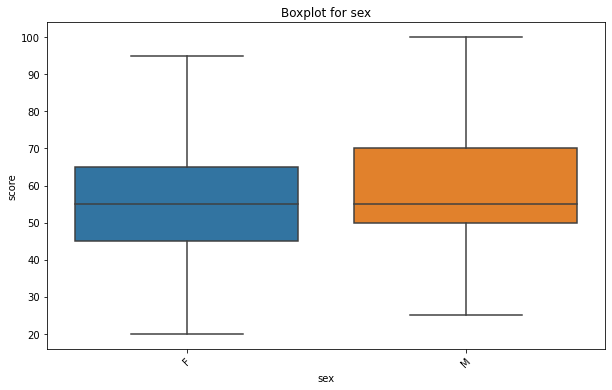

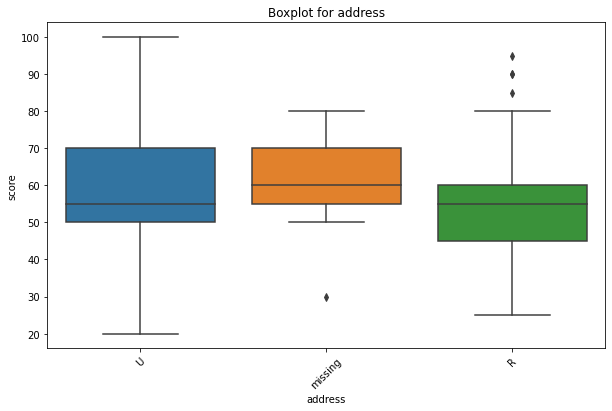

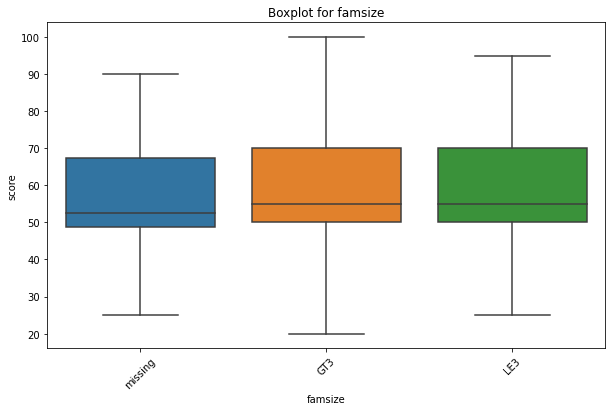

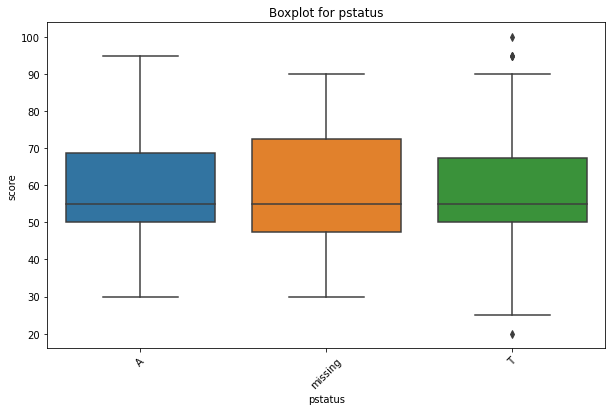

In [1247]:
for col in ['sex', 'address', 'famsize', 'pstatus']:
    get_boxplot(col)

In [1248]:
# Let's look at the statistical significance

for col in ['sex', 'address', 'famsize', 'pstatus']:
    get_stat_dif(col)

The statistical significance has been found for column  sex
The statistical significance has been found for column  address


In [1249]:
# We see that sex is affect score in this dataset, but our goal is to find out, what conditions of life affect
# math score, so we don't need to conside it.
# Address is also affect math score.

#### Columns "mjob", "fjob", "reason", "guardian"

In [1250]:
display(pd.DataFrame(data.mjob.value_counts()))
display(pd.DataFrame(data.fjob.value_counts()))
display(pd.DataFrame(data.reason.value_counts()))
display(pd.DataFrame(data.guardian.value_counts()))

# The values seems to be ok, so let's replace the missing entry with the most frequent one, with the moda.

data['mjob'] = data['mjob'].fillna(data['mjob'].mode()[0])
data['reason'] = data['reason'].fillna(data['reason'].mode()[0])
data['fjob'] = data['fjob'].fillna(data['fjob'].mode()[0])
data['guardian'] = data['guardian'].fillna(data['guardian'].mode()[0])

,mjob
other,127
services,92
at_home,57
teacher,55
health,32


,fjob
other,189
services,97
teacher,28
at_home,16
health,15


,reason
course,134
home,100
reputation,99
other,31


,guardian
mother,243
father,84
other,23


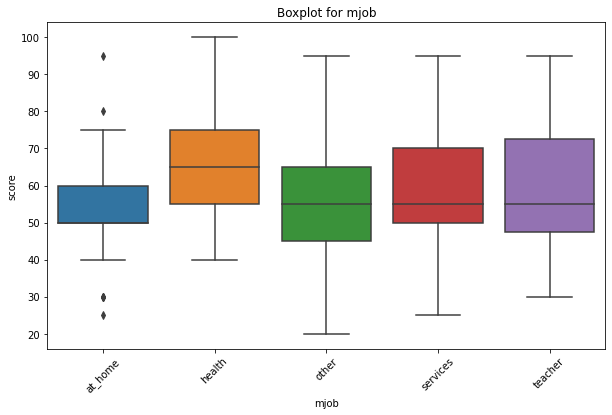

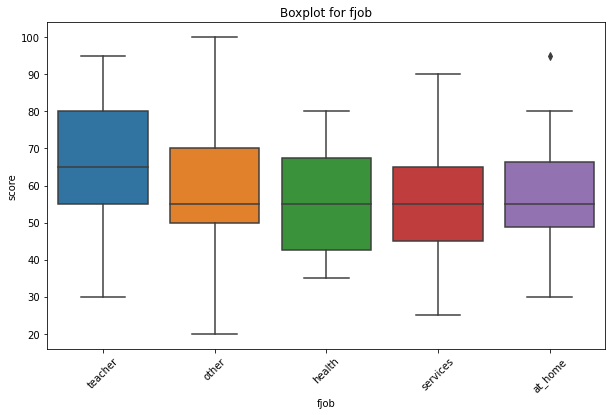

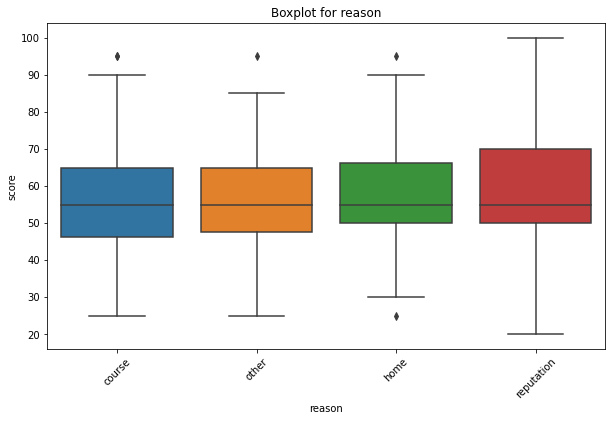

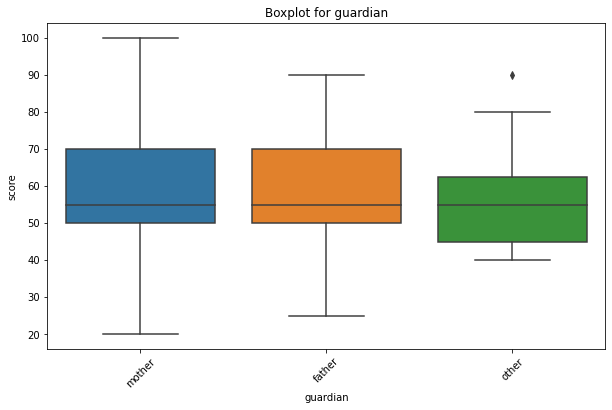

In [1251]:
for col in ['mjob', 'fjob', 'reason', 'guardian']:
    get_boxplot(col)

In [1252]:
# The graphs show that the data from the columns reason and guardian does not affect the math score,
# but mother and father job may affect. Let's check this.

In [1253]:
for col in ['mjob', 'fjob', 'reason', 'guardian']:
    get_stat_dif(col)

The statistical significance has been found for column  mjob


In [1254]:
# Mother job is affect on math score. We can say that if mother works in health care
# her child's math scores will be higher.

#### Columns "medu", "fedu", "traveltime", "studytime", "studytime, granular"

In [1255]:
display(pd.DataFrame(data.medu.value_counts()))

display(pd.DataFrame(data.fedu.value_counts()))
data['fedu'] = data['fedu'].replace(40.0, 4.0)

display(pd.DataFrame(data.traveltime.value_counts()))
display(pd.DataFrame(data.studytime.value_counts()))
display(pd.DataFrame(data['studytime, granular'].value_counts()))

,medu
4.0,129
2.0,96
3.0,93
1.0,56
0.0,3


,fedu
2.0,101
3.0,91
4.0,88
1.0,74
0.0,2
40.0,1


,traveltime
1.0,234
2.0,92
3.0,21
4.0,7


,studytime
2.0,185
1.0,101
3.0,63
4.0,27


,"studytime, granular"
-6.0,185
-3.0,101
-9.0,63
-12.0,27


In [1256]:
# We can see, that data column "studytime, granular" is the data in "studytime" multiplied by (-3).
# So we can delete it.

data.drop(['studytime, granular'], inplace=True, axis=1)

In [1257]:
# Let's fill the missing data with moda value

data['medu'] = data['medu'].fillna(data['medu'].mode()[0])
data['fedu'] = data['fedu'].fillna(data['fedu'].mode()[0])
data['traveltime'] = data['traveltime'].fillna(data['traveltime'].mode()[0])
data['studytime'] = data['studytime'].fillna(data['studytime'].mode()[0])

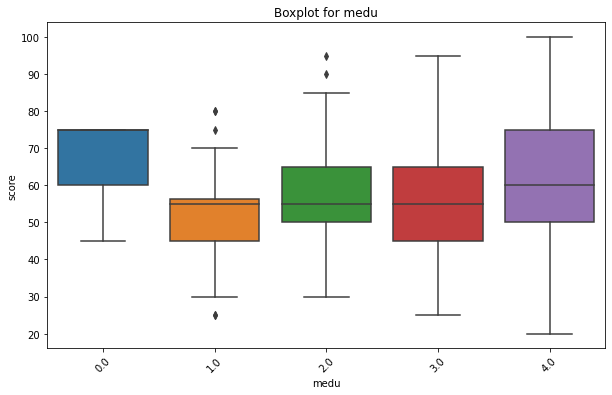

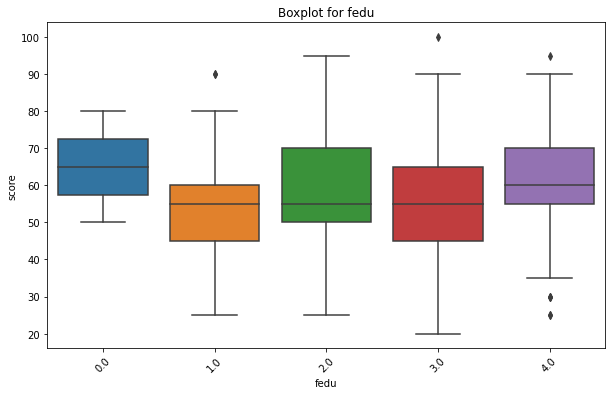

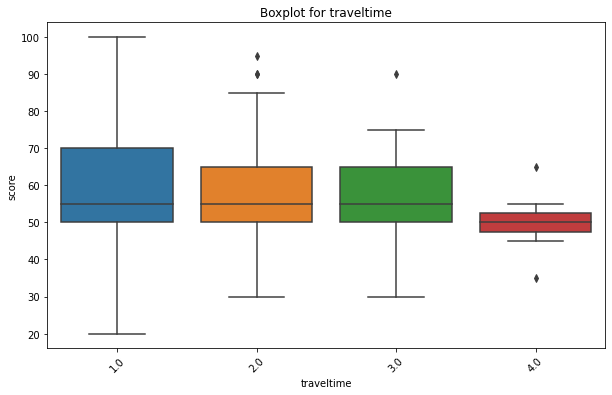

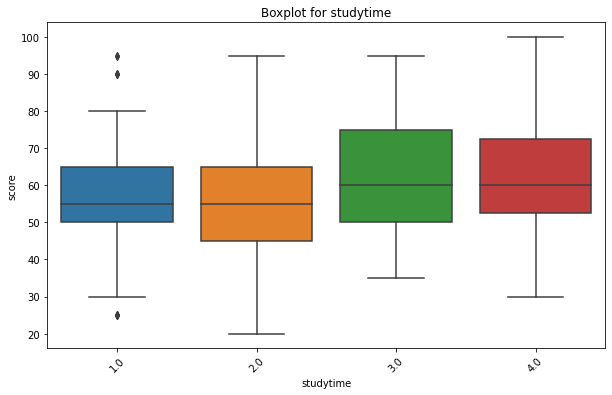

In [1258]:
for col in ['medu', 'fedu', 'traveltime', 'studytime']:
    get_boxplot(col)

In [1259]:
for col in ['medu', 'fedu', 'traveltime', 'studytime']:
    get_stat_dif(col)

The statistical significance has been found for column  medu
The statistical significance has been found for column  fedu
The statistical significance has been found for column  studytime


In [1260]:
# Mother and father education affect on math score. It's strange but if parents have no eduction
# their child's math scores will be higher.
# Addition lessons are also affect math score. The more additional lessons, the higher the scores.

#### Columns "failures", "famrel", "freetime", "goout", "health"

In [1261]:
display(pd.DataFrame(data.failures.value_counts()))

display(pd.DataFrame(data.famrel.value_counts()))

# There is a mistake in data so I replace -1.0 to 1.0

data['famrel'] = data['famrel'].replace(-1.0, 1.0)

display(pd.DataFrame(data.freetime.value_counts()))

display(pd.DataFrame(data.goout.value_counts()))

display(pd.DataFrame(data.health.value_counts()))

,failures
0.0,286
1.0,47
2.0,14
3.0,14


,famrel
4.0,176
5.0,92
3.0,61
2.0,16
1.0,7
-1.0,1


,freetime
3.0,149
4.0,108
2.0,62
5.0,36
1.0,17


,goout
3.0,125
2.0,99
4.0,77
5.0,50
1.0,22


,health
5.0,134
3.0,86
4.0,59
1.0,45
2.0,42


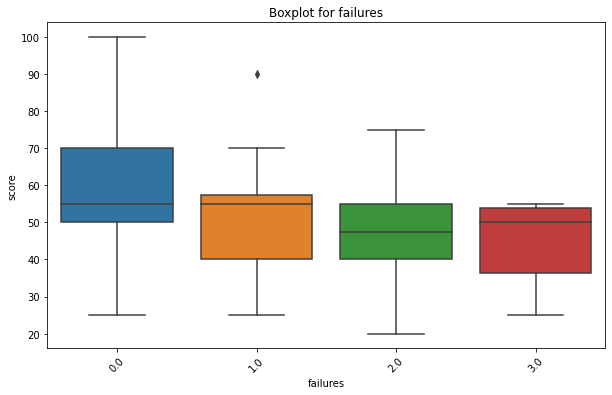

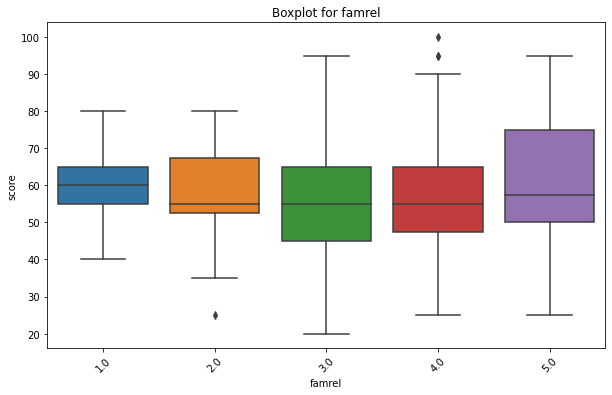

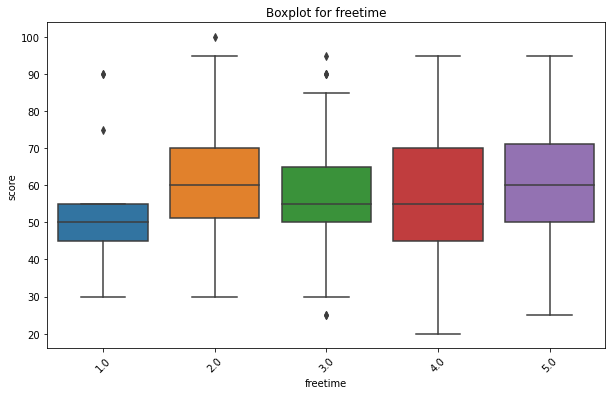

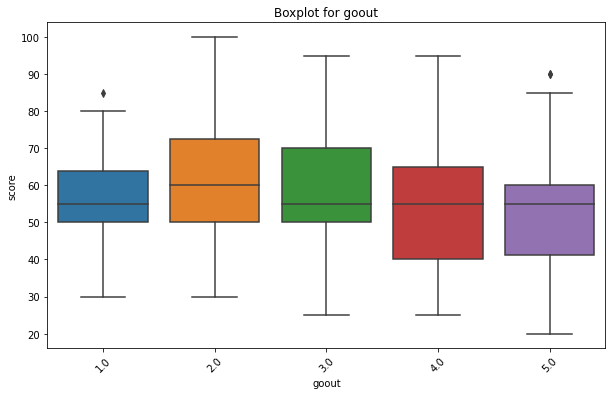

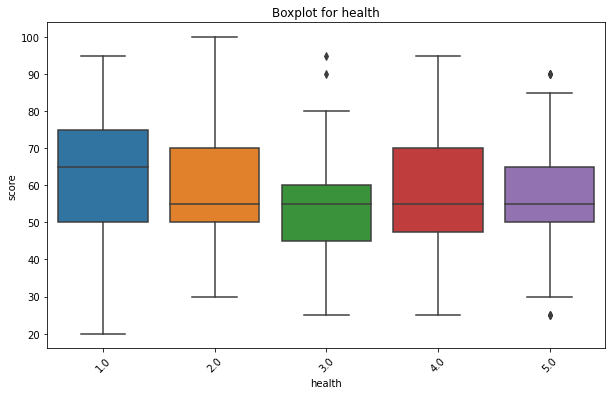

In [1262]:
# Let's fill the missing data with moda value

data['failures'] = data['failures'].fillna(data['failures'].mode()[0])
data['famrel'] = data['famrel'].fillna(data['famrel'].mode()[0])
data['freetime'] = data['freetime'].fillna(data['freetime'].mode()[0])
data['goout'] = data['goout'].fillna(data['goout'].mode()[0])
data['health'] = data['health'].fillna(data['health'].mode()[0])

for col in ['failures', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [1263]:
for col in ['failures', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

The statistical significance has been found for column  failures
The statistical significance has been found for column  goout


In [1264]:
# Failures affects math score. More failures, less score.
# Spending time with friends also affects math score.

#### Columns "schoolsup", "famsup",  "paid",  "activities",  "nursery", "famsup", "higher", "internet", "romantic"


In [1265]:
display(pd.DataFrame(data.schoolsup.value_counts()))

display(pd.DataFrame(data.famsup.value_counts()))

display(pd.DataFrame(data.paid.value_counts()))

display(pd.DataFrame(data.activities.value_counts()))

display(pd.DataFrame(data.nursery.value_counts()))

display(pd.DataFrame(data.higher.value_counts()))

display(pd.DataFrame(data.internet.value_counts()))

display(pd.DataFrame(data.romantic.value_counts()))

,schoolsup
no,324
yes,47


,famsup
yes,214
no,131


,paid
no,195
yes,147


,activities
yes,188
no,179


,nursery
yes,290
no,75


,higher
yes,342
no,19


,internet
yes,292
no,54


,romantic
no,232
yes,121


In [1266]:
# These columns contain only two types of values. I decided to fill missing data with the word "missing".

data['schoolsup'] = data['schoolsup'].fillna('missing')
data['famsup'] = data['famsup'].fillna('missing')
data['paid'] = data['paid'].fillna('missing')
data['activities'] = data['activities'].fillna('missing')
data['nursery'] = data['nursery'].fillna('missing')
data['famsup'] = data['famsup'].fillna('missing')
data['higher'] = data['higher'].fillna('missing')
data['internet'] = data['internet'].fillna('missing')
data['romantic'] = data['romantic'].fillna('missing')

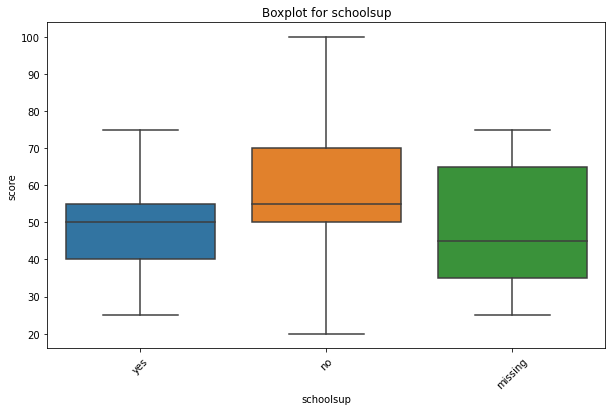

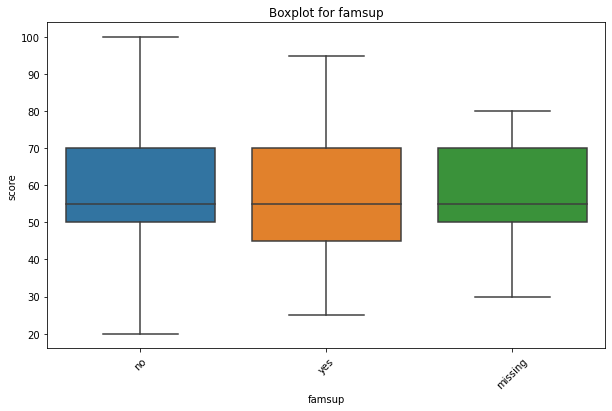

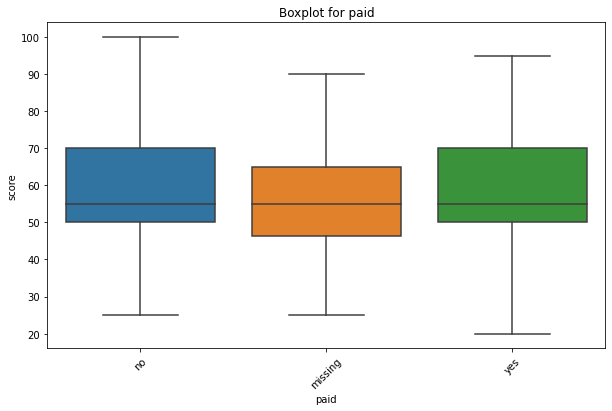

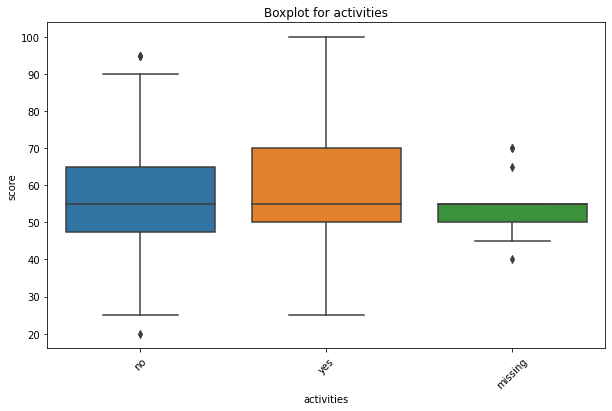

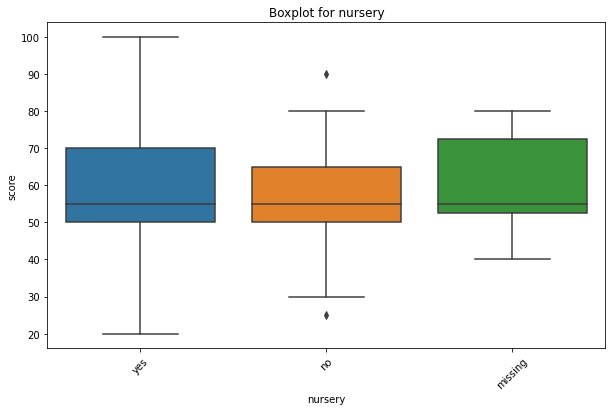

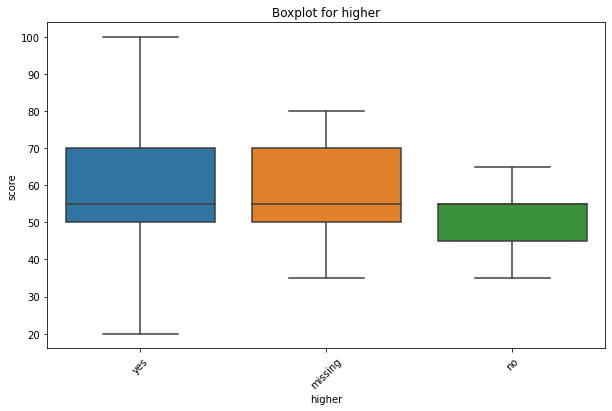

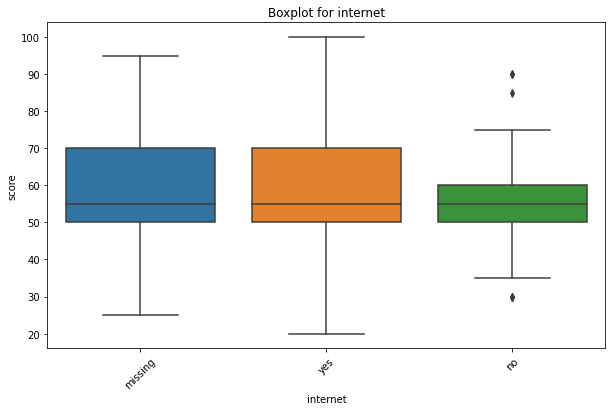

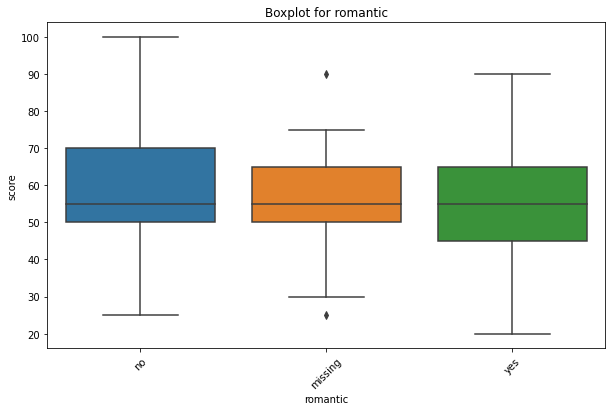

In [1267]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [1268]:
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

The statistical significance has been found for column  schoolsup


In [1269]:
# Conclusion: school eduction support affect math score.

# Conclusion

So, in our case, the important variables
which may have affect the score are: 
absences
adress 
mjob 
medu 
fedu 
studytime 
failures 
goout 
schoolsup

In [1218]:
data_score = data[['score', 'absences', 'address', 'mjob',
                   'medu', 'fedu', 'studytime', 'failures', 'goout', 'schoolsup']]

In [1270]:
data_score['address'] = data_score['address'].replace('U', 1)
data_score['address'] = data_score['address'].replace('R', -1)
data_score['address'] = data_score['address'].replace('missing', 0)

In [1274]:
data_score['schoolsup'] = data_score['schoolsup'].replace('yes', 1)
data_score['schoolsup'] = data_score['schoolsup'].replace('no', 0)
data_score['schoolsup'] = data_score['schoolsup'].replace('missing', -1)

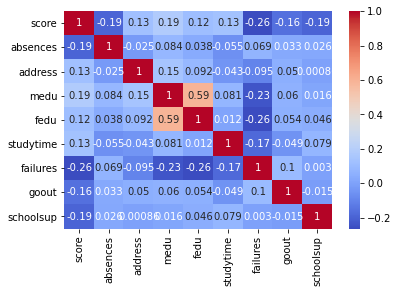

In [1275]:
sns.heatmap(data_score.corr(), annot=True, cmap='coolwarm')

In [1276]:
score_for_model = data[['absences', 'address', 'mjob', 'medu',
                        'fedu', 'studytime', 'failures', 'goout', 'schoolsup']]

It's time for conclusion.

So, as a result of the EDA to analyze the influence of living conditions of students aged 15 to 22 on their performance in mathematics, the following conclusions were obtained:

Almost all columns have got empty values, but not many.
Outliers are in the score values and absences values, mistakes are in 'fedu' and 'famrel' columns.
So we can say that the data is clean enough.

The most important parameters that are proposed to be used in the future for building a model are: number of absences, mother job, mother and father eduction level, time for additional studeing and time for friends, number of failures and school education support. 